In [1]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

#Load Data and review content
iris_data = pd.read_csv("iris.csv")

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())

#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Targe

In [3]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 33ms/step - loss: 0.8409 - accuracy: 0.6481 - val_loss: 0.7089 - val_accuracy: 0.7037
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 0.8241 - val_loss: 0.5862 - val_accuracy: 0.7778
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4083 - accuracy: 0.8519 - val_loss: 0.5213 - val_accuracy: 0.7778
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3399 - accuracy: 0.8889 - val_loss: 0.4795 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2996 - accuracy: 0.8796 - val_loss: 0.4438 - val_accuracy: 0.8148
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2646 - accuracy: 0.9167 - val_loss: 0.4160 - val_accuracy: 0.8148
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2371 - accuracy: 0.9167 - val_loss: 0.4197

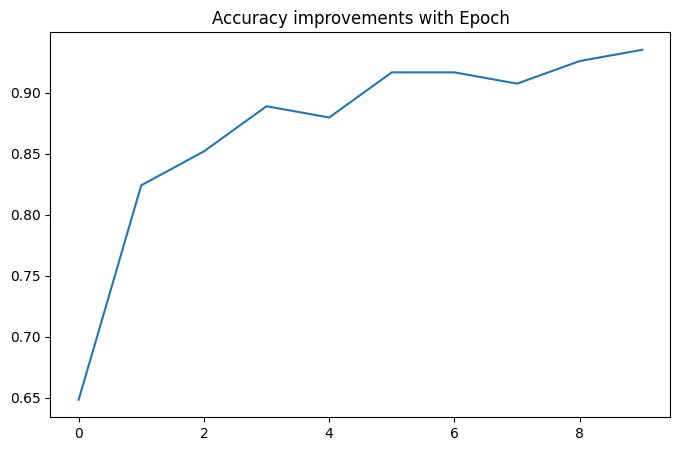


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 25ms/step - loss: 0.2185 - accuracy: 0.9333


[0.2185044288635254, 0.9333333373069763]

In [4]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [5]:
# Assuming your trained model is named 'model'
# The model outputs probabilities for each class
y_pred_probabilities = model.predict(X_test)

# Convert the probabilities to class labels (0, 1, 2, etc.)
# This gets the index of the highest probability for each prediction
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Note: You'll also need to inverse transform your one-hot encoded y_test
# to get the true class labels for comparison.
# For example, if you used to_categorical, you can use np.argmax on y_test as well.
y_test_labels = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred)

# Generate a classification report
report = classification_report(y_test_labels, y_pred, target_names=['setosa', 'versicolor', 'virginica'])

print("\n--- Deep Learning Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

1/1 [==============================] - 0s 77ms/step

--- Deep Learning Model Evaluation ---
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.83      0.91         6
   virginica       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



In [6]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 14ms/step
Raw Prediction Output (Probabilities) : [[0.01525825 0.73130286 0.25343898]]
Prediction is  ['versicolor']
